Face Recognition using CNN by Yugeshwar.P

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import drive
import os

# 1. Mount Drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Yugesh/People'
if os.path.exists(dataset_path):
    print("✅ Main folder found!")
    print("Contents:", os.listdir(dataset_path))
else:
    print(" Error: Could not find the folder. Please check the path.")
img_height = 128
img_width = 128
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax') # 3 Output neurons for Yuges, Visvesh, Manoj
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train
print("Starting training...")
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

model.save('face_recognition_model.h5')
print("✅ Model saved!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Main folder found!
Contents: ['Manoj', 'Yuges', 'Visvesh']
Found 20 images belonging to 3 classes.
Found 4 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4500 - loss: 1.0969 - val_accuracy: 0.5000 - val_loss: 1.9822
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4000 - loss: 1.9665 - val_accuracy: 0.2500 - val_loss: 1.7299
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3500 - loss: 1.5428 - val_accuracy: 0.2500 - val_loss: 1.2819
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4000 - loss: 1.1702 - val_accuracy: 0.2500 - val_loss: 1.1117
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3500 - loss: 1.1082 - val_accuracy: 0.5000 - val_loss: 1.0681
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4500 - loss: 1.0578 - val_accuracy: 0.5000 - val_loss: 1.0645
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6500 - loss: 1.0252 - val_accuracy: 0.5000 - val_loss: 1.0366
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6000 - loss: 0.9958 - val_accuracy: 0.5000 - val_loss: 1.0240
Epoch 9/15
1/1 ━

✅ Model saved!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading model...


Analyzing face...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


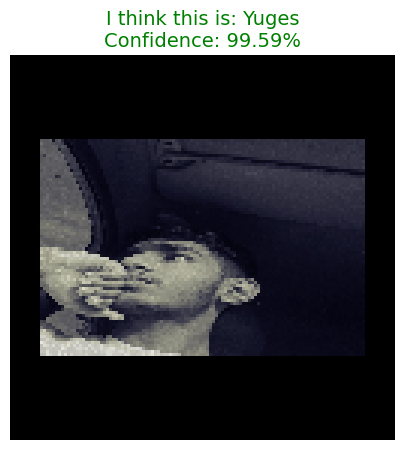

✅ Prediction: Yuges
📊 Confidence: 99.59%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# 1. Load the trained model
# (Make sure you ran the training code first!)
print("Loading model...")
model = load_model('face_recognition_model.h5')

# The computer sorts folder names alphabetically: M, V, Y
class_names = ['Manoj', 'Visvesh', 'Yuges']

img_path = '/content/drive/MyDrive/Yugesh/People/Yuges/Snapchat-619033876.jpg'

try:
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Make a batch of 1
    img_array /= 255.0  # Normalize (0-1)

    print("Analyzing face...")
    predictions = model.predict(img_array)

    predicted_index = np.argmax(predictions)
    predicted_name = class_names[predicted_index]
    confidence = np.max(predictions) * 100

    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')

    # Color text green if sure, red if unsure
    text_color = 'green' if confidence > 70 else 'red'

    plt.title(f"I think this is: {predicted_name}\nConfidence: {confidence:.2f}%",
              color=text_color, fontsize=14)
    plt.show()

    print(f"✅ Prediction: {predicted_name}")
    print(f"📊 Confidence: {confidence:.2f}%")

except Exception as e:
    print(f"❌ Error: {e}")
    print("Please check if the image path is correct!")